In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cust = pd.read_csv('/content/Customer Churn.csv')
cust.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [ ]:
cust['TotalCharges'] = cust['TotalCharges'].replace(' ',0)
cust['TotalCharges'] = cust['TotalCharges'].astype(float)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
cust.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
cust['customerID'].duplicated().sum()

0

In [ ]:
cust.duplicated().sum()

0

In [ ]:
def convert(value):
   if value == 1:
     return 'Yes'
   else:
     return 'No'

cust['SeniorCitizen'] = cust['SeniorCitizen'].apply(convert)

In [ ]:
cust.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Converted 0 and 1 value of senior citizen to Yes/No to make it easier to understand

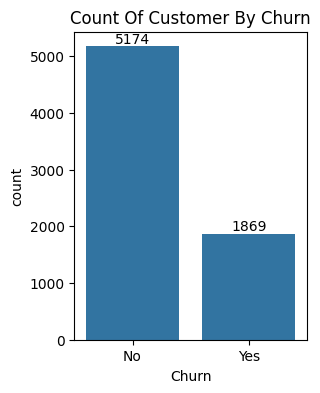

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x=cust['Churn'])
ax.bar_label(ax.containers[0])
plt.title('Count Of Customer By Churn',fontsize=12)
plt.show()

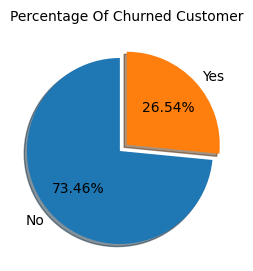

In [ ]:
plt.figure(figsize=(3,4))
gb = cust.groupby('Churn')['Churn'].count()
plt.pie(gb, labels=gb.index, autopct='%1.2f%%',shadow = True, startangle=90,explode = (0.1,0))
plt.title('Percentage Of Churned Customer',fontsize = 10)
plt.show()



* From the given pie chart 26.54% of our customer have churned out.
* Now let's explore the reason behind that.


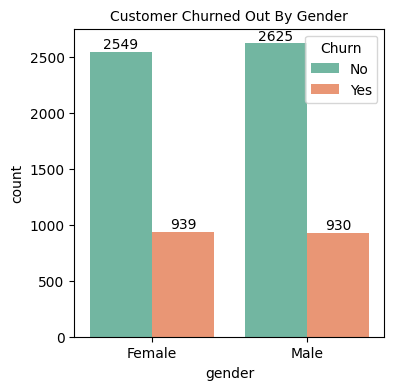

In [ ]:
plt.figure(figsize=(4,4))
mx = sns.countplot(x='gender',hue='Churn', data=cust,palette = 'Set2')
mx.bar_label(mx.containers[0])
mx.bar_label(mx.containers[1])
plt.title('Customer Churned Out By Gender',fontsize=10)
plt.show()

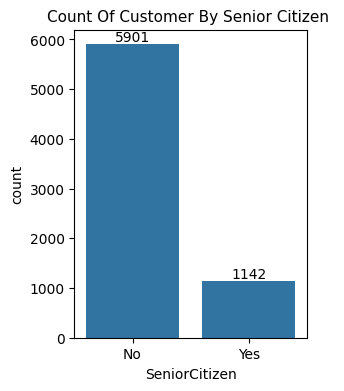

In [ ]:
plt.figure(figsize=(3,4))
bx = sns.countplot(x='SeniorCitizen',data = cust)
bx.bar_label(bx.containers[0])
plt.title('Count Of Customer By Senior Citizen ',fontsize=11)
plt.show()

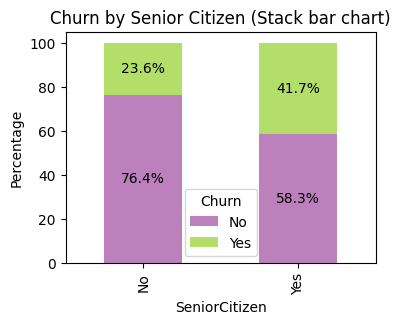

In [ ]:
grouped = cust.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
grouped_perc = grouped.div(grouped.sum(axis=1), axis=0) * 100

ax = grouped_perc.plot(kind='bar', stacked=True, figsize=(4, 3),
                          color= ['#bc80bd', '#b3de69'] )

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()

    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%',
                ha='center', va='center', fontsize=10, color='black')

plt.title('Churn by Senior Citizen (Stack bar chart)', fontsize=12)
plt.xlabel('SeniorCitizen', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

plt.show()

* Comparatively a greater percentage of people in senior citizen category have churned

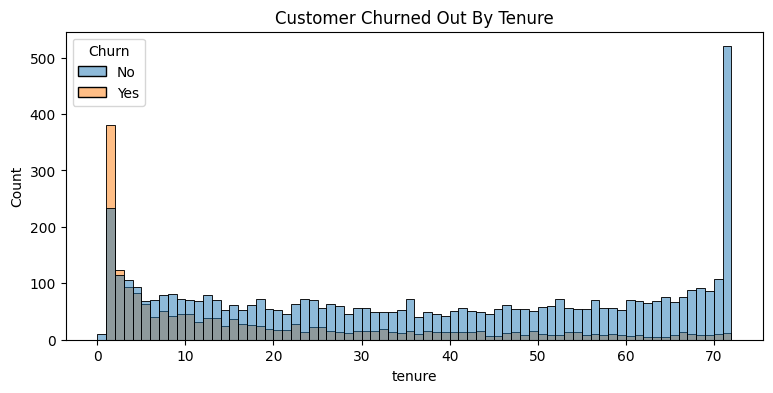

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure',data= cust,hue = 'Churn',bins=72)
plt.title('Customer Churned Out By Tenure',fontsize=12)
plt.show()

* Customers who have engaged with our services long-term have stayed,whereas a significant portion of those who used the service for just 1 or 2 months have churned.

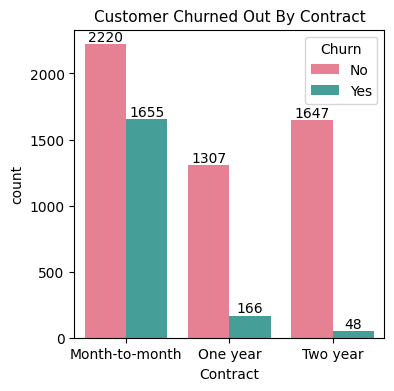

In [ ]:
plt.figure(figsize=(4,4))
cx = sns.countplot(x ='Contract', data = cust,hue = 'Churn',palette= 'husl')
cx.bar_label(cx.containers[0])
cx.bar_label(cx.containers[1])
plt.title('Customer Churned Out By Contract',fontsize=11)
plt.show()

* People who have month-to-month contract are more likely to churn in comparison to those who have 1 or 2 year contract

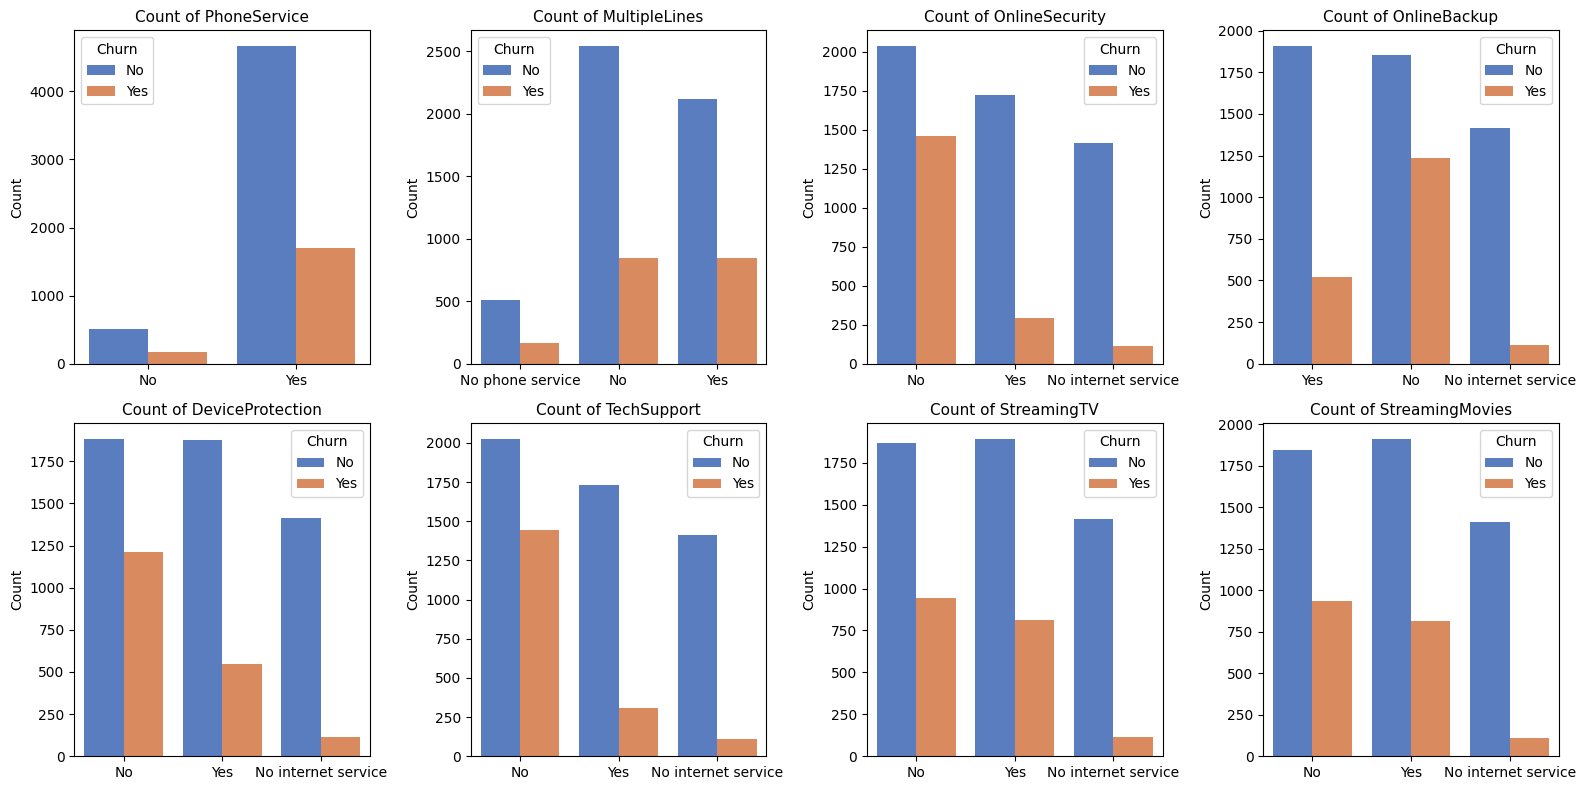

In [ ]:
columns = ['PhoneService', 'MultipleLines','OnlineSecurity',
           'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and a grid of subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot on each subplot
for i, col in enumerate(columns):
    sns.countplot(x=cust[col], ax=axes[i],hue=cust['Churn'],palette = 'muted')
    axes[i].set_title(f'Count of {col}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust the layout so that plots don't overlap
plt.tight_layout()

plt.show()

* Customers who subscribe to online security and backup services are less likely to churn.
* For services like Online Backup ,Tech Support and Streaming TV churn rates are noticeably higher when these services are not used or unavailable.

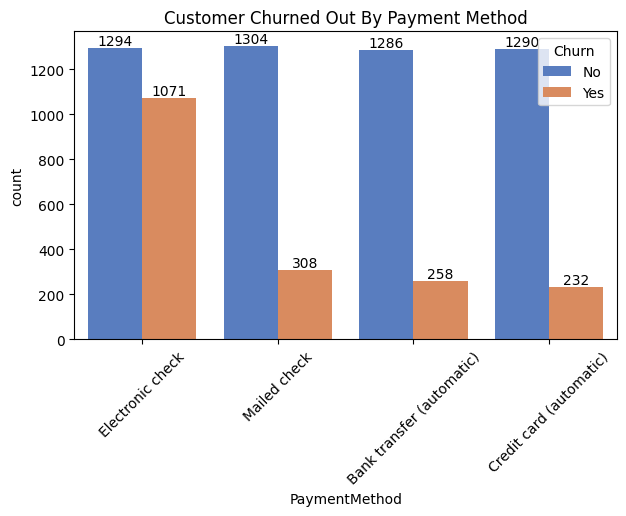

In [ ]:
plt.figure(figsize=(7,4))
dx = sns.countplot(x='PaymentMethod',hue='Churn',data=cust,palette = 'muted')
dx.bar_label(dx.containers[0])
dx.bar_label(dx.containers[1])
plt.title('Customer Churned Out By Payment Method',fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Customer is likely to churn when they are using Electronic check as payment method

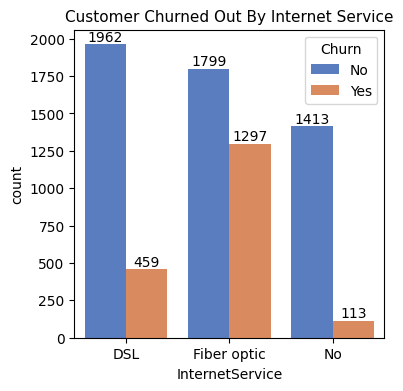

In [ ]:
plt.figure(figsize=(4,4))
mx = sns.countplot(x='InternetService',hue='Churn',data=cust,palette = 'muted')
plt.title('Customer Churned Out By Internet Service',fontsize=11)
mx.bar_label(mx.containers[0])
mx.bar_label(mx.containers[1])
plt.show()

* The majority of customer who are using optical fibre service tend to churn